# Modelling Notebook
**Note**: This notebook has the modelling section alone. I have made another notebook [EDA and Feature Engineering Titanic](https://www.kaggle.com/aakashveera/eda-and-feature-engineering-titanic) which has the feature engineering and pre-processing section.<br>
<br>
**In this notebook I have tried out several algorithms(logistic regression, SVM, KNN, Decision Tree, RandomForest, Xgboost)**
<br>

**As well as Several Ensemble methods such as Bagging, Boosting as well as voting.**
<br>

Here, I am going to use my cleaned version of titanic data [Pre-Processed Titanic Dataset](https://www.kaggle.com/aakashveera/preprocessed-titanic-dataset) which is created using the notebook [EDA and Feature Engineering Titanic](https://www.kaggle.com/aakashveera/eda-and-feature-engineering-titanic). Check it out for the data pre-processing. <br>

If you have better prepared data try these algorithms and ensembles with your data.

Also you can use this dataset [Pre-Processed Titanic Dataset](https://www.kaggle.com/aakashveera/preprocessed-titanic-dataset) directly if you want to skip the data cleaning part and want to try out machine learning.
<br>



**Note for Begginers:** To use the cleaned dataset click on Add data on your right of the kernel.
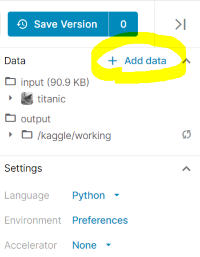
<br>
Select search by url and paste the link [Pre-Processed Titanic Dataset](https://www.kaggle.com/aakashveera/preprocessed-titanic-dataset) and click add button will be added to the kernel and you can access it directly similarly to the titanic dataset. (Don't forget to upvote if you like the dataset and notebook)
 

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# to ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [ ]:
df = pd.read_csv("/kaggle/input/preprocessed-titanic-dataset/train.csv")
test = pd.read_csv("/kaggle/input/preprocessed-titanic-dataset/test.csv")

In [ ]:
df.head()

In [ ]:
test.head()

For Linear Models such as Logistic Regression, SVM as well as KNN data needs to be in Scaled.
<br>For tree based models such as Decision tree, RandomForest, and other ensemble methods normal data is sufficient. Let's try both.
<br>

Before that let's do train, validaion split to evaluate the performance of the model using train_test_split of sklearn. <br>
random_state is just any number to do the same split each time you call the function and its optional. <br>
stratify to divide the ratio of class 0 and 1 and train and test equally and it is again optional.

In [ ]:
from sklearn.model_selection import train_test_split
X = df.drop('Survived',axis=1)
y = df['Survived']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42,stratify=y)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scal = scaler.fit_transform(X_train)
X_test_scal = scaler.transform(X_test)

We will try LogisticRegression, SVM, KNN,Decision Tree, RandomForest and xgboost algorithms.
<br><br>
For each model we will try the default hyperparameters and then try tuning hyperparameters using GridSearch. You can increase the paramaters in gridsearchcv param_grid but remember it also increases the time to fit

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix

### Logistic Regression

In [ ]:
model_log = LogisticRegression()
model_log.fit(X_train_scal,y_train)
pred = model_log.predict(X_test_scal)
print(classification_report(y_test,pred))
confusion_matrix(y_test,pred)

In [ ]:
param_grid = {
    'penalty':['none', 'l1', 'l2', 'elasticnet'],
    'C':  [0.001, 0.01, 0.1, 1, 10, 100, 1000] ,
    'solver':['ewton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'max_iter':[100,300,900],
}

grid = GridSearchCV( LogisticRegression(),param_grid=param_grid,n_jobs=-1)
grid.fit(X_train_scal,y_train)
pred = grid.predict(X_test_scal)
print(classification_report(y_test,pred))
confusion_matrix(y_test,pred)

### Support Vector Machines

In [ ]:
model_svc = SVC(probability=True)
model_svc.fit(X_train_scal,y_train)
pred = model_svc.predict(X_test_scal)
print(classification_report(y_test,pred))
confusion_matrix(y_test,pred)

### KNN

In [ ]:
error_rate = []

for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train_scal,y_train)
    pred_i = knn.predict(X_test_scal)
    error_rate.append(np.mean(pred_i != y_test))

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

We got the lowest possible errror at n_neighbours = 15 we will use it

In [ ]:
model_knn =  KNeighborsClassifier(n_neighbors=15)
model_knn.fit(X_train_scal,y_train)
pred = model_knn.predict(X_test_scal)
print(classification_report(y_test,pred))
confusion_matrix(y_test,pred)

### Decision Tree

In [ ]:
model_dt = DecisionTreeClassifier()
model_dt.fit(X_train,y_train)
pred = model_dt.predict(X_test)
print(classification_report(y_test,pred))
confusion_matrix(y_test,pred)

Now Let's plot how the decision tree was actually built. The image is large and zoom in to the maximum to see the features

In [ ]:
from sklearn.tree import plot_tree
plt.figure(figsize=(100,100))
plot_tree(model_dt,feature_names=X_train.columns.values,  
                   class_names=["0","1"],
                   filled=True);

In [ ]:
param_grid = {
    'criterion': ["gini", "entropy"],
    'max_depth' : [5, 8, 15, 25,None],
    'min_samples_split' : [2, 5, 10, 15],
    'max_features' :["auto", "sqrt", "log2"],
    'min_samples_leaf' : [1, 2, 5] 
}

grid = GridSearchCV(DecisionTreeClassifier(),param_grid=param_grid,verbose=1,n_jobs=-1)
grid.fit(X_train,y_train)
pred = grid.predict(X_test)
print(classification_report(y_test,pred))
confusion_matrix(y_test,pred)

In [ ]:
grid.best_estimator_

If you want to check image of the tuned decision tree you cannot visualize directly from the gridsearch. <br><br>
Refit the model with the best above estimators then plot using the same method 

### RandomForest

In [ ]:
model_random = RandomForestClassifier(200,n_jobs=-1)
model_random.fit(X_train,y_train)
pred = model_random.predict(X_test)
print(classification_report(y_test,pred))
confusion_matrix(y_test,pred)

In [ ]:
param_grid = {
    'criterion': ["gini", "entropy"],
    'max_depth' : [5, 8, 15, 25,None],
    'min_samples_split' : [2, 5, 10, 15],
    'bootstrap' : [True,False],
    'max_features' :["auto", "sqrt", "log2"],
    'min_samples_leaf' : [1, 2, 5] 
}

grid = GridSearchCV(RandomForestClassifier(200,random_state=1),param_grid=param_grid,verbose=1,n_jobs=-1)
grid.fit(X_train,y_train)
pred = grid.predict(X_test)
print(classification_report(y_test,pred))
confusion_matrix(y_test,pred)

### XGBOOST

In [ ]:
model_xgb = xgb.XGBClassifier()
model_xgb.fit(X_train,y_train)
pred = model_xgb.predict(X_test)
print(classification_report(y_test,pred))
confusion_matrix(y_test,pred)

In [ ]:
params = {'objective':"binary:logistic",
          'base_score':0.005,
          'eval_metric':'error',
          'n_jobs':-1
}
trainm = xgb.DMatrix(X_train,y_train)
validm = xgb.DMatrix(X_test,y_test)

In [ ]:
from sklearn.metrics import accuracy_score
def accuracy(y_prob, dtrain):
    y_true = dtrain.get_label()
    best_mcc = accuracy_score(y_true, (y_prob>0.5)*1)
    return 'accuracy_score', best_mcc

In [ ]:
watchlist = [(trainm, 'train'), (validm, 'val')]
xgb_model = xgb.train(params, trainm,
                num_boost_round=100,
                evals=watchlist,
                early_stopping_rounds=20,
                feval=accuracy,
                maximize=True
                )

In [ ]:
xgb_model = xgb.train(params, trainm,
                num_boost_round=7,
                feval=accuracy
                )

In [ ]:
pred = xgb_model.predict(validm)
print(classification_report(y_test,(pred>0.5)*1))
confusion_matrix(y_test,(pred>0.5)*1)

In [ ]:
#feature importance graph of XGboost
xgb.plot_importance(model_xgb)

The above image shows the the feature importance for the xgboost algorithm.<br><br>
feature importance can't be plotted for KNN and SVC with a rbf kernel 
<br><br>
XGboost, KNN and SVC has performed well in the individual performance. Now lets try out ensembling techniques to improve the score further. 

## 1. Probality based prediction voter

let's predict the probablity using different models and then average the probablities. Finally the prob>0.5 can be made 1 and less than 0.5 as 0

In [ ]:
np.set_printoptions(suppress=True)
xgb_pred = xgb_model.predict(validm)
knn_pred = model_knn.predict_proba(X_test_scal)[:,0]
svc_pred = model_svc.predict_proba(X_test_scal)[:,0]

In [ ]:
log_pred = model_log.predict_proba(X_test_scal)[:,0]
dt_pred = model_dt.predict_proba(X_test)[:,0]
random_pred = model_random.predict_proba(X_test)[:,0]

In [ ]:
combined_pred = 1*((knn_pred + svc_pred+ log_pred)/3 < 0.5)

print(classification_report(y_test,combined_pred))
confusion_matrix(y_test,combined_pred)

In [ ]:
combined_pred = 1*((knn_pred + svc_pred+ log_pred+ xgb_pred )/4 < 0.5)

print(classification_report(y_test,combined_pred))
confusion_matrix(y_test,combined_pred)

Feel free to try out all other combinations and find whether there is a improvement in score.<br>

### **But don't forgot to use scaled data for linear models (logistic, SVC and KNN) and normal data for other algorithms**


## 2. Voting Classifier

Now lets try voting classifier with only linear models as well as all models

In [ ]:
from sklearn.ensemble import VotingClassifier
vote = VotingClassifier(estimators=[('svc',SVC()),
                                    ('knn',KNeighborsClassifier(n_neighbors=15)),
                                    ('log',LogisticRegression()),
                                   ])
vote.fit(X_train_scal,y_train)
pred = vote.predict(X_test_scal)
print(classification_report(y_test,pred))
confusion_matrix(y_test,pred)

In [ ]:
from sklearn.ensemble import VotingClassifier
vote = VotingClassifier(estimators=[('svc',SVC()),
                                    ('knn',KNeighborsClassifier(n_neighbors=15)),
                                    ('log',LogisticRegression()),
                                    ('Xgboost',xgb.XGBClassifier()),
                                    #('dtree',DecisionTreeClassifier(criterion='entropy', max_depth=5, max_features='sqrt',min_samples_leaf=2, min_samples_split=10)),
                                    ('randomf',RandomForestClassifier(200,n_jobs=-1))
                                   ])
vote.fit(X_train_scal,y_train)
pred = vote.predict(X_test_scal)
print(classification_report(y_test,pred))
confusion_matrix(y_test,pred)

## 3. Bagging

Since KNN has performed the best I have tried the bagging and boosting with KNN. Feel free to try for other algorithms too but remember bagging will lead to overfitting in several cases

In [ ]:
from sklearn.ensemble import BaggingClassifier

In [ ]:
bag = BaggingClassifier(base_estimator=KNeighborsClassifier(n_neighbors=15),n_estimators=7,n_jobs=-1,random_state=4)
bag.fit(X_train_scal,y_train)
pred = bag.predict(X_test_scal)
print(classification_report(y_test,pred))
confusion_matrix(y_test,pred)

## 4.Boosting

Boosting is converting weak learners into strong learners. XGboost is based on Adaboost.

**Note**: Adaboost does not support SVM and KNN.

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

In [ ]:
boost = AdaBoostClassifier(base_estimator=RandomForestClassifier(n_estimators=200,n_jobs=-1),n_estimators=20)
boost.fit(X_train,y_train)
pred = boost.predict(X_test)
print(classification_report(y_test,pred))
confusion_matrix(y_test,pred)

# Predict on Test Data

We find that our KNN model with bagging have given us the best score! **0.84**. So let's make predictions on the test data.

In [ ]:
scaler = StandardScaler()
scaler.fit(X)
test_scal = scaler.transform(test.drop(['PassengerId'],axis=1))

In [ ]:
test['Survived'] = bag.predict(test_scal)

In [ ]:
test[['PassengerId','Survived']].to_csv("submission.csv",index=False)

Thanks for reading my kernel any improvements will be welcomed and if you like this kernel give a upvote !